<a href="https://colab.research.google.com/github/njoyce98/HAR-GraphGAN-Dissertation/blob/main/Conv_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.model_selection import train_test_split
from sklearn import svm
import os
import csv
import time
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
import sklearn.metrics as metrics
from tensorflow.keras.callbacks import EarlyStopping
import math
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import Lambda
from keras.optimizers import Adam
from keras import backend
from keras.utils.vis_utils import plot_model
import pickle
import random
from matplotlib import pyplot
import matplotlib
from numpy.random import randn
from numpy.random import randint
from numpy import expand_dims
from numpy import zeros
from numpy import ones

In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# open mhad dataframe from pickle
with open('/content/drive/My Drive/Colab Notebooks/Datasets/MHAD_df30fps.pickle', 'rb') as data:
    mhad_df = pickle.load(data)

In [4]:
# splis dataframe into frames
def split_frames(df, flat=False):
  labels = []
  frames = []

  headers = np.array(df.columns)[:-2]
  for row in range(0, len(df), 30):
    sing_frame = []
    labels.append(df.iloc[row]['Label'])
    for between_row in range(row, row+30):
      sing_frame.append(df.iloc[between_row][headers])
    frames.append(sing_frame)
  
  frames = np.array(frames)
  labels = np.array(labels)

  a,b,c = frames.shape
  if flat:
    frames = frames.reshape(a,1800)
  else:
    frames = frames.reshape(a,b, 20, 3)

  return frames, labels

In [5]:
mhad_X, mhad_Y = split_frames(mhad_df, False)

In [6]:
#Dataset to use on flat input models: Auto encoder and lstm models. Each is (1,1800) not (30,20,3)
mhad_Xf, mhad_Yf = split_frames(mhad_df, True)

In [7]:
mhad_X.shape

(354, 30, 20, 3)

In [8]:
#split the data
X_train, X_test, Y_train, Y_test = train_test_split(mhad_X, mhad_Y, test_size = 0.2, random_state = 0, stratify=mhad_Y)

In [9]:
#CNN
def make_model():
  cnn_model = tf.keras.Sequential()
  cnn_model.add(tf.keras.layers.Conv2D(128, (4, 1), padding='same', input_shape=X_train[0].shape))
  cnn_model.add(LeakyReLU(alpha=0.1))
  cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

  cnn_model.add(tf.keras.layers.Conv2D(256, (4, 1), padding='same'))
  cnn_model.add(LeakyReLU(alpha=0.1))
  cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

  cnn_model.add(tf.keras.layers.Conv2D(512, (4, 1), padding='same'))
  cnn_model.add(LeakyReLU(alpha=0.1))
  cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

  cnn_model.add(tf.keras.layers.Flatten())

  cnn_model.add(tf.keras.layers.Dense(32))
  cnn_model.add(LeakyReLU(alpha=0.1))
  cnn_model.add(tf.keras.layers.Dropout(0.6))

  cnn_model.add(tf.keras.layers.Dense(6, activation='softmax'))
  
  return cnn_model

In [10]:
# #CAE
# def make_model():
#   cnn_model = tf.keras.Sequential()
#   cnn_model.add(tf.keras.layers.Conv2D(128, (4, 1), padding='same', input_shape=X_train[0].shape))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

#   cnn_model.add(tf.keras.layers.Conv2D(64, (4, 1), padding='same'))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

#   cnn_model.add(tf.keras.layers.Conv2D(32, (4, 1), padding='same'))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.MaxPooling2D(2,2))

#   cnn_model.add(tf.keras.layers.Conv2D(64, (4, 1), padding='same'))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.UpSampling2D((2, 2)))

#   cnn_model.add(tf.keras.layers.Conv2D(128, (4, 1), padding='same'))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.UpSampling2D((2, 2)))

#   cnn_model.add(tf.keras.layers.Conv2D(600, (4, 1), padding='same'))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.UpSampling2D((2, 2)))

#   cnn_model.add(tf.keras.layers.Flatten())

#   cnn_model.add(tf.keras.layers.Dense(32))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.6))

#   cnn_model.add(tf.keras.layers.Dense(6, activation='softmax'))
  
#   return cnn_model

In [11]:
# #AELSTM
# def make_model():
#   cnn_model = tf.keras.Sequential()
  
#   cnn_model.add(tf.keras.layers.Dense(128,input_dim=1800, activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(64,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(32,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(64,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(128,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(1800,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(128,activation='relu'))
#   cnn_model.add(tf.keras.layers.Reshape((128,1)))
#   cnn_model.add(tf.keras.layers.LSTM(128))
  

#   cnn_model.add(tf.keras.layers.Flatten())

#   cnn_model.add(tf.keras.layers.Dense(32))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.4))

#   cnn_model.add(tf.keras.layers.Dense(6, activation='softmax'))
  
#   return cnn_model

In [12]:
# #LSTM
# def make_model():
#   cnn_model = tf.keras.Sequential()
  
#   cnn_model.add(tf.keras.layers.Dense(128,input_dim=1800, activation='relu'))
#   cnn_model.add(tf.keras.layers.Reshape((128,1)))
#   cnn_model.add(tf.keras.layers.LSTM(128))
  

#   cnn_model.add(tf.keras.layers.Flatten())

#   cnn_model.add(tf.keras.layers.Dense(32))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.4))

#   cnn_model.add(tf.keras.layers.Dense(6, activation='softmax'))
  
#   return cnn_model

In [13]:
# #AECNN
# def make_model():
#   cnn_model = tf.keras.Sequential()
  
#   cnn_model.add(tf.keras.layers.Dense(128,input_dim=1800, activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(64,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(32,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(64,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(128,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(1800,activation='relu'))
#   cnn_model.add(tf.keras.layers.Dense(1800,activation='relu'))
#   cnn_model.add(tf.keras.layers.Reshape((30,20,3)))
#   cnn_model.add(tf.keras.layers.Conv2D(128, (4, 1)))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.1))

#   cnn_model.add(tf.keras.layers.Conv2D(256, (4, 1)))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.2))

#   cnn_model.add(tf.keras.layers.Conv2D(512, (4, 1)))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.5))

#   cnn_model.add(tf.keras.layers.Flatten())

#   cnn_model.add(tf.keras.layers.Dense(32))
#   cnn_model.add(LeakyReLU(alpha=0.1))
#   cnn_model.add(tf.keras.layers.Dropout(0.6))

#   cnn_model.add(tf.keras.layers.Dense(6, activation='softmax'))
  
#   return cnn_model

In [14]:
cnn_model = make_model()
# plot the model
#plot_model(cnn_model, to_file='/content/drive/My Drive/Colab Notebooks/Model pics/LSTM_model.png', show_shapes=True, show_layer_names=True)

In [15]:
# make model, train and evaluate
cnn_model.compile(optimizer=keras.optimizers.Nadam(lr = 0.001, beta_1 = 0.9),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=tf.keras.metrics.SparseCategoricalAccuracy())
history = cnn_model.fit(X_train, Y_train, epochs = 100, validation_split=0.2, batch_size = 64, verbose=1)
a, b = cnn_model.evaluate(X_test, Y_test)

Epoch 1/100
4/4 [==============================] - 3s 181ms/step - loss: 1.6367 - sparse_categorical_accuracy: 0.3004 - val_loss: 1.0215 - val_sparse_categorical_accuracy: 0.5789
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 1.1964 - sparse_categorical_accuracy: 0.5394 - val_loss: 0.6903 - val_sparse_categorical_accuracy: 0.7193
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7845 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.4785 - val_sparse_categorical_accuracy: 0.8246
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.8688 - sparse_categorical_accuracy: 0.6826 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.9123
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.5233 - sparse_categorical_accuracy: 0.7921 - val_loss: 0.3445 - val_sparse_categorical_accuracy: 0.8596
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.4216 - sparse_categorical_accuracy:

In [16]:
# plots train validation accuracy to graph
def plot_hist(history):
  plt.figure(figsize=[10,5])
  plt.subplot(121)
  plt.plot(history.history['sparse_categorical_accuracy'])
  plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training Accuracy',
            'Validation Accuracy'])
  plt.title('Accuracy Curves')

  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training Loss',
            'Validation Loss'])
  plt.title('Loss Curves')
  plt.show()

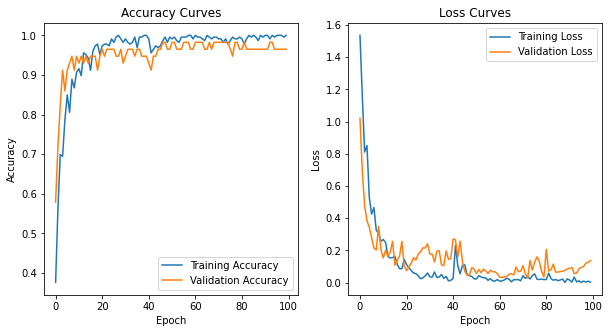

In [17]:
plot_hist(history)

In [18]:
# plots confusion matrix
def conf_matrix(model, X_test, Y_test):
  actions = ['Clapping_hands', 'Jumping_in_place', 'Punching', 'Sit_down', 'Stand_up', 'Throwing_a_ball']
  model.evaluate(X_test, Y_test)
  predict = np.argmax(model.predict(X_test), axis=-1)
  conf_matrix = metrics.confusion_matrix(y_true = Y_test, y_pred = predict)
  disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=actions)
  disp.plot(xticks_rotation='vertical')

3/3 [==============================] - 0s 4ms/step - loss: 0.1445 - sparse_categorical_accuracy: 0.9577


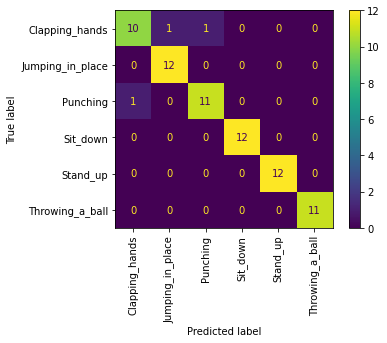

In [19]:
conf_matrix(cnn_model, X_test, Y_test)

#NTU

In [20]:
with open('/content/drive/My Drive/Colab Notebooks/Datasets/NTU_df30fps.pickle', 'rb') as data:
    ntu_df = pickle.load(data)

In [21]:
ntu_X, ntu_Y = split_frames(ntu_df, False)

In [22]:
#Dataset to use on flat input models: Auto encoder and lstm models.
ntu_Xf, ntu_Yf = split_frames(ntu_df, True)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(ntu_X, ntu_Y, test_size = 0.2, random_state = 0, stratify=ntu_Y)

In [26]:
cnn_model = make_model()
cnn_model.compile(optimizer=tf.keras.optimizers.Nadam(lr=0.0001, beta_1 = 0.9),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=tf.keras.metrics.SparseCategoricalAccuracy())
history = cnn_model.fit(X_train, Y_train, epochs = 100, validation_split=0.2, batch_size = 64, verbose=1)
a, b = cnn_model.evaluate(X_test, Y_test)

Epoch 1/100
28/28 [==============================] - 1s 17ms/step - loss: 1.7972 - sparse_categorical_accuracy: 0.1803 - val_loss: 1.7613 - val_sparse_categorical_accuracy: 0.3206
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 1.7599 - sparse_categorical_accuracy: 0.2328 - val_loss: 1.7242 - val_sparse_categorical_accuracy: 0.2780
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 1.7168 - sparse_categorical_accuracy: 0.2717 - val_loss: 1.6730 - val_sparse_categorical_accuracy: 0.3274
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 1.6852 - sparse_categorical_accuracy: 0.3028 - val_loss: 1.5968 - val_sparse_categorical_accuracy: 0.4058
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 1.6088 - sparse_categorical_accuracy: 0.3658 - val_loss: 1.4825 - val_sparse_categorical_accuracy: 0.4731
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 1.5281 - sparse_categorical_ac

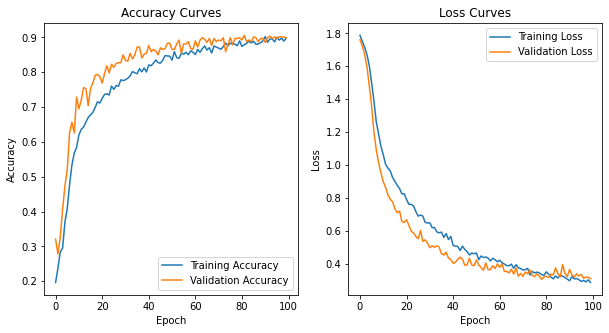

In [27]:
plot_hist(history)

18/18 [==============================] - 0s 3ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8815


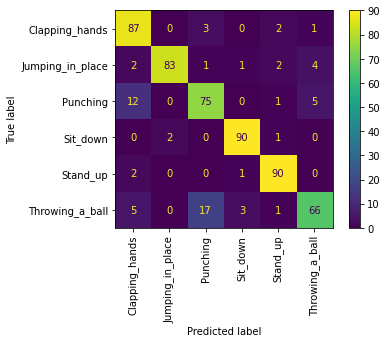

In [28]:
conf_matrix(cnn_model, X_test, Y_test)

# CNN-GAN

In [29]:
# custom activation function
def custom_activation(output):
	logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result

In [30]:
### https://machinelearningmastery.com/semi-supervised-generative-adversarial-network/
### https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/

In [31]:
def define_discriminator(in_shape=(30,20,3,1), n_classes=6):
  # input label
  in_label = Input(shape=(1,))
  # input data
  in_image = Input(shape=in_shape)
  li = tf.keras.layers.Embedding(n_classes, 30)(in_label)
  n_nodes = 30*20*3

  li = Dense(n_nodes)(li)
  li = Reshape((in_shape[0], in_shape[1], in_shape[2], 1))(li)

  # concat label as a channel
  merge = tf.keras.layers.Concatenate()([in_image, li])
  # downsample
  fe = Conv2D(128, (4,1), padding='same')(merge)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Dropout(0.1)(fe)
  fe = tf.keras.layers.Conv2D(256, (4, 1))(fe)
  fe = LeakyReLU(alpha=0.1)(fe)
  fe = Dropout(0.2)(fe)
  fe = tf.keras.layers.Conv2D(512, (4, 1))(fe)
  fe = LeakyReLU(alpha=0.1)(fe)
  fe = tf.keras.layers.Conv2D(32, (4, 1))(fe)
  fe = LeakyReLU(alpha=0.1)(fe)
  # flatten feature maps
  fe = Flatten()(fe)
  fe = Dropout(0.4)(fe)
  out_layer = Dense(n_classes)(fe)


  d_out_layer = Lambda(custom_activation)(out_layer)
  # define model
  d_model = Model([in_image, in_label], d_out_layer)
  # compile model
  opt = tf.keras.optimizers.Nadam(lr=0.0001, beta_1=0.9)
  d_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  c_out_layer = Activation('softmax')(out_layer)
  # define and compile supervised discriminator model
  c_model = Model([in_image, in_label], outputs=c_out_layer)
  c_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Nadam(lr=0.0001, beta_1=0.9), metrics=['accuracy'])
  return d_model, c_model

In [32]:
def define_generator(latent_dim, n_classes=6):
  # label input
  in_label = Input(shape=(1,))
  # embedding for label
  li = tf.keras.layers.Embedding(n_classes, 30)(in_label)
  n_nodes = 15*10*3
  li = Dense(n_nodes)(li)
  # reshape to additional channel
  li = Reshape((15, 10, 3))(li)

  # generator input
  in_lat = Input(shape=(latent_dim,))
  n_nodes = 128 * 15 * 10 * 3
  gen = Dense(n_nodes)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Reshape((15, 10, 384))(gen)
  # merge gen and label input
  merge = tf.keras.layers.Concatenate()([gen, li])
  # upsample
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
  gen = LeakyReLU(alpha=0.2)(gen)
  # output
  gen = Conv2D(64, (4,4), activation='tanh', padding='same')(gen)
  gen = Dropout(0.5)(gen)
  gen = Conv2D(128, (4,4), activation='tanh', padding='same')(gen)
  gen = Dropout(0.5)(gen)
  gen = Conv2D(256, (4,4), activation='tanh', padding='same')(gen)
  gen = Dropout(0.5)(gen)
  gen = Conv2D(512, (4,4), activation='tanh', padding='same')(gen)
  gen = Dropout(0.5)(gen)
  out_layer = Conv2D(3, (15,10), activation='tanh', padding='same')(gen)
  # define model
  model = Model([in_lat, in_label], out_layer)
  return model

In [33]:
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = tf.keras.optimizers.Adam(lr=0.0001, beta_1=0.9)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [34]:
def select_supervised_samples(dataset, n_samples=100, n_classes=6):
  X, y = dataset
  X_list, y_list = list(), list()
  n_per_class = int(n_samples / n_classes)
  for i in range(n_classes):
    # get all images for this class
    X_with_class = X[y == i]
    # choose random instances
    ix = random.sample(range(0, len(X_with_class)), n_per_class)
    # add to list
    [X_list.append(X_with_class[j]) for j in ix]
    [y_list.append(i) for j in ix]
  return np.asarray(X_list), np.asarray(y_list)

In [35]:
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = random.sample(range(0, images.shape[0]), n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = np.ones((n_samples, 1))
	return [X, labels], y

In [36]:
def generate_latent_points(latent_dim, n_samples, n_classes=6):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  z_input, labels_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  images = generator.predict([z_input, labels_input])
  # create class labels
  y = zeros((n_samples, 1))
  return [images, labels_input], y

In [37]:
def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=20, n_batch=64):
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  X_sup, y_sup = select_supervised_samples(dataset)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      [Xsup_real, y_labels], y_real = generate_real_samples([X_sup, y_sup], half_batch)
      #train classifier on real data with class labels
      c_loss, c_acc = c_model.train_on_batch([Xsup_real, y_labels], y_labels)
      #generate real samples
      [X_real, y_labels], y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights with real samples and truth label
      d_loss1, d_acc1 = d_model.train_on_batch([X_real, y_labels], y_real)
      # generate 'fake' examples
      [X_fake, y_labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights with fake samples and truth label
      d_loss2, d_acc2 = d_model.train_on_batch([X_fake, y_labels], y_fake)
      # generate latent points and label for generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
      # summarize loss on this batch
      print('>%d, c[%.3f,%.0f], d1[%.3f,%.3f], d2[%.3f,%.3f], g[%.3f]'
      % (i+1, c_loss, c_acc*100, d_loss1, d_acc1*100, d_loss2, d_acc2*100, g_loss))
  # save the generator model
  g_model.save('cgan_generator.h5')
 

In [38]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model, c_model = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, d_model)

# plot the model
plot_model(c_model, to_file='/content/drive/My Drive/Colab Notebooks/Model pics/GANclass_model.png', show_shapes=True, show_layer_names=True)
# load image data
dataset = (mhad_X, mhad_Y)
# train model
train(generator, d_model, c_model, gan_model, dataset, latent_dim)

>1, c[1.794,16], d1[0.154,100.000], d2[1.948,0.000], g[0.154]
>1, c[1.774,34], d1[0.148,100.000], d2[1.948,0.000], g[0.154]
>1, c[1.721,41], d1[0.139,100.000], d2[1.954,0.000], g[0.153]
>1, c[1.677,53], d1[0.132,100.000], d2[1.974,0.000], g[0.152]
>1, c[1.690,44], d1[0.122,100.000], d2[2.004,0.000], g[0.153]
>2, c[1.611,56], d1[0.128,100.000], d2[1.981,0.000], g[0.168]
>2, c[1.572,50], d1[0.130,100.000], d2[1.868,0.000], g[0.190]
>2, c[1.495,53], d1[0.135,100.000], d2[1.809,0.000], g[0.194]
>2, c[1.305,62], d1[0.127,100.000], d2[1.841,0.000], g[0.179]
>2, c[1.042,78], d1[0.120,100.000], d2[1.925,0.000], g[0.160]
>3, c[1.360,34], d1[0.132,100.000], d2[2.001,0.000], g[0.150]
>3, c[1.009,72], d1[0.086,100.000], d2[2.055,0.000], g[0.144]
>3, c[0.843,81], d1[0.090,100.000], d2[2.155,0.000], g[0.139]
>3, c[0.858,72], d1[0.111,100.000], d2[2.240,0.000], g[0.142]
>3, c[0.786,78], d1[0.078,100.000], d2[2.181,0.000], g[0.181]
>4, c[0.802,78], d1[0.121,100.000], d2[1.798,0.000], g[0.330]
>4, c[0.

In [39]:
with open('/content/drive/My Drive/Colab Notebooks/Datasets/MHAD_scaler.pickle', 'rb') as data:
    mhad_scaler = pickle.load(data)

In [40]:
# All joints in order
ntu_joints = ['Pelvis', 'Abs', 'Neck', 'Head', 'Left shoulder', 'Left elbow', 'Left forearm', 'Right shoulder',
 'Right elbow', 'Right forearm', 'Left hip', 'Left knee', 'Left ankle', 'Left toes', 'Right hip',
 'Right knee', 'Right ankle', 'Right toes', 'Left fingers', 'Right fingers']

# Joints that start an edge
start_nodes = ["Pelvis", "Abs", "Neck", "Abs", "Left shoulder", "Left elbow", "Left forearm", "Abs", "Right shoulder", "Right elbow", "Right forearm",
               "Pelvis", "Left hip", "Left knee", "Left ankle", "Pelvis", "Right hip", "Right knee", "Right ankle"]

# Joints that end an edge
end_nodes = ["Abs", "Neck", "Head", "Left shoulder", "Left elbow", "Left forearm", "Left fingers", "Right shoulder", "Right elbow", "Right forearm",
             "Right fingers", "Left hip", "Left knee", "Left ankle", "Left toes", "Right hip", "Right knee", "Right ankle", "Right toes"]

# Pairs between joints
pairs = []
for x in range(len(start_nodes)):
  pairs.append((start_nodes[x], end_nodes[x]))

In [41]:
from keras.models import load_model

In [42]:
actions = ['Clapping_hands', 'Jumping_in_place', 'Punching', 'Sit_down', 'Stand_up', 'Throwing_a_ball']

In [43]:
#label to generate action of from above
chose_label = 5

In [44]:
model = load_model('cgan_generator.h5', compile = False)
# generate images
latent_points, labels = generate_latent_points(100, 1)
# generate images
X_fake = model.predict([latent_points, np.array([chose_label])])

In [45]:
X_fake = X_fake.reshape(30,20,3)

data = []
for x in X_fake:
  row = []
  for y in x:
    for z in y:
      row.append(z)
  data.append(row)

headers = np.array(mhad_df.columns)[:-2]
new_df = pd.DataFrame(data = data, columns = headers)

with open('/content/drive/My Drive/Colab Notebooks/Datasets/mhad_time.pickle', 'rb') as data:
    time = pickle.load(data)

In [46]:
time_col = []
for x in range(30):
  time_col.append(time.iloc[x])

new_df['Time'] = time_col
new_X = mhad_scaler.inverse_transform(new_df)
new_h = headers.copy()
new_h = np.append(new_h, 'Time')
out_df = pd.DataFrame(data = new_X, columns = new_h)

def label30(label):
  out = []
  for x in range(30):
    #out.append(label[0][0])
    out.append(label)
  return out

out_df['Label'] = label30(chose_label)

In [47]:
# Find the max and min of x, y, z for plotting graph

rows, cols = out_df.shape
size = 20
ymax = -1
ymin = 100
xmax = -1
xmin = 100
zmax = -1
zmin = 100

for x in range(size):
    n = 3*x+1
    if (out_df.iloc[:, n].max() > xmax):
        xmax = out_df.iloc[:, n].max()
    if (out_df.iloc[:, n+1].max() > ymax):
        ymax = out_df.iloc[:, n+1].max()
    if (out_df.iloc[:, n+2].max() > zmax):
        zmax = out_df.iloc[:, n+2].max()

    if (out_df.iloc[:, n].min() < xmin):
        xmin = out_df.iloc[:, n].min()
    if (out_df.iloc[:, n+1].min() < ymin):
        ymin = out_df.iloc[:, n+1].min()
    if (out_df.iloc[:, n+2].min() < zmin):
        zmin = out_df.iloc[:, n+2].min()

xrange = abs(xmax - xmin)
yrange = abs(ymax - ymin)
zrange = abs(zmax - zmin)

large_range = max(xrange, yrange, zrange)

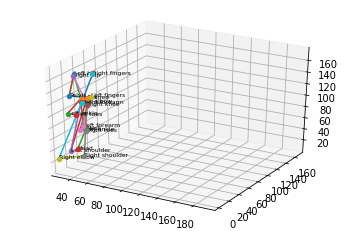

In [48]:
#plot output as animated 3d graph

fig = plt.figure()
ax = plt.axes(projection='3d')

def clear_axes():
  ax.clear()
  ax.set_xlim(xmin, xmin+large_range)
  ax.set_ylim(zmin, zmin+large_range)
  ax.set_zlim(ymin, ymin+large_range)

def plot_frame(f):
  clear_axes()
  
  for x in ntu_joints:
    datax = out_df[x+".X"][f]
    datay = out_df[x+".Y"][f]
    dataz = out_df[x+".Z"][f]
    ax.scatter3D(datax, datay, dataz)
    ax.text(datax, datay, dataz, x, fontsize=6)
  
  for fst, sec in pairs:
    fx = out_df[fst + ".X"][f]
    fy = out_df[fst + ".Y"][f]
    fz = out_df[fst + ".Z"][f]

    sx = out_df[sec + ".X"][f]
    sy = out_df[sec + ".Y"][f]
    sz = out_df[sec + ".Z"][f]

    ax.plot([fx, sx], [fy, sy], [fz, sz])
    

ani = animation.FuncAnimation(fig, plot_frame, frames=30, interval=300, blit=False)
ani.save('/content/drive/My Drive/Colab Notebooks/Model outputs/CNN' + actions[chose_label] + '.gif', writer='pillow')

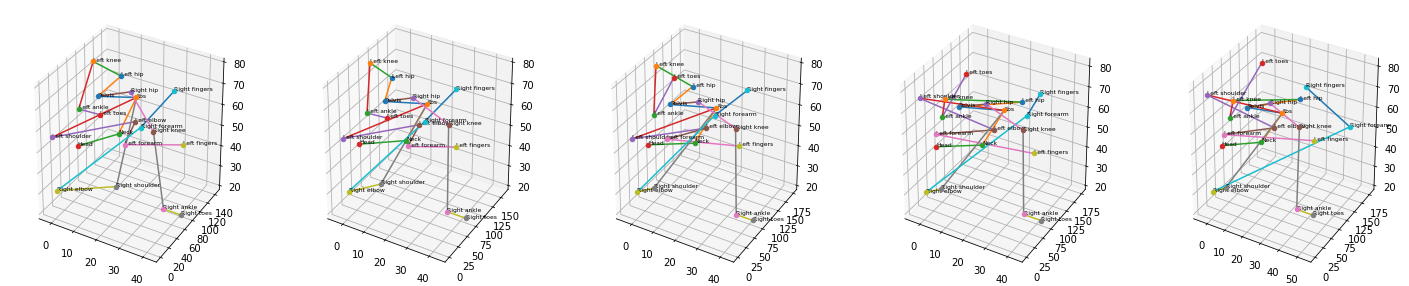

In [49]:
# Plot animation as 5 frames next to eachother

fig2 = plt.figure(figsize=(25, 5))
axis1 = fig2.add_subplot(151, projection='3d')

axis2 = fig2.add_subplot(152, projection='3d')
axis3 = fig2.add_subplot(153, projection='3d')
axis4 = fig2.add_subplot(154, projection='3d')
axis5 = fig2.add_subplot(155, projection='3d')

def set_lims(ax):
  ax.set_xlim(xmin, xmin+large_range)
  ax.set_ylim(zmin, zmin+large_range)
  ax.set_zlim(ymin, ymin+large_range)

def plot_pics(f, axis):
  
  for x in ntu_joints:
    datax = out_df[x+".X"][f]
    datay = out_df[x+".Z"][f]
    dataz = out_df[x+".Y"][f]
    axis.scatter3D(datax, datay, dataz)
    axis.text(datax, datay, dataz, x, fontsize=6)
  
  for fst, sec in pairs:
    fx = out_df[fst + ".X"][f]
    fy = out_df[fst + ".Z"][f]
    fz = out_df[fst + ".Y"][f]

    sx = out_df[sec + ".X"][f]
    sy = out_df[sec + ".Z"][f]
    sz = out_df[sec + ".Y"][f]

    axis.plot([fx, sx], [fy, sy], [fz, sz])

frames = [0, 5, 11, 17, 23, 29]
axis = [axis1, axis2, axis3, axis4, axis5]
for x in range(5):
  plot_pics(frames[x], axis[x])

#fig2.savefig('/content/drive/My Drive/Colab Notebooks/Model outputs/CNN'  + str(actions[chose_label]) + 'FRAMES.png')